In [319]:
import os
os.getcwd()

'C:\\Users\\RAHUL SRIVASTAVA\\Desktop\\Learnbay\\ML\\Random_Forest'

In [320]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows',None)
pd.set_option('display.max_Columns',None)
pd.set_option('display.width',None)


In [321]:
pwd

'C:\\Users\\RAHUL SRIVASTAVA\\Desktop\\Learnbay\\ML\\Random_Forest'

In [322]:
dataset = pd.read_csv('Churn_Modelling.csv')

In [323]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [324]:
dataset = dataset.drop(['RowNumber','CustomerId','Surname'],axis=1)

# Preprocessing

In [325]:
# Check Duplicate Customer - any duplicate rntire row data u have to remove
dataset.duplicated().sum()

0

In [326]:
# Check missing data
dataset.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [327]:
# Check information about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [328]:
dataset['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [329]:
dataset['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [330]:
#OHE
dataset= pd.get_dummies(dataset,columns=['Geography'])

In [331]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [332]:
#dummy variable
dataset = dataset.drop(['Geography_France'],axis=1)

In [333]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,Female,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,Female,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,True


In [334]:
#Label Encoder
dataset['Gender'] = dataset['Gender'].astype('category')
dataset['Gender'] = dataset['Gender'].cat.codes

In [335]:
dataset.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,True


In [336]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Gender             10000 non-null  int8   
 2   Age                10000 non-null  int64  
 3   Tenure             10000 non-null  int64  
 4   Balance            10000 non-null  float64
 5   NumOfProducts      10000 non-null  int64  
 6   HasCrCard          10000 non-null  int64  
 7   IsActiveMember     10000 non-null  int64  
 8   EstimatedSalary    10000 non-null  float64
 9   Exited             10000 non-null  int64  
 10  Geography_Germany  10000 non-null  bool   
 11  Geography_Spain    10000 non-null  bool   
dtypes: bool(2), float64(2), int64(7), int8(1)
memory usage: 732.6 KB


# Splitting the data into dependent and independent variable

In [337]:

x = dataset.drop(['Exited'],axis=1)
y= dataset[['Exited']]

In [338]:
x.shape,y.shape

((10000, 11), (10000, 1))

In [339]:
y.value_counts()

Exited
0         7963
1         2037
Name: count, dtype: int64

# Treatment for Imbalance is required however we use stratify to balance training and test data

In [340]:
import imblearn 
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote,y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print(y_smote.value_counts())


Exited
0         7963
1         2037
Name: count, dtype: int64
Exited
0         7963
1         7963
Name: count, dtype: int64


In [341]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify =y,random_state=101)
#smote
# x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.2,random_state=101)


# Feature Scaling

In [342]:
#data leakage problem 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train) 
x_test = sc.transform(x_test)

# fit_transform():
# Purpose: This method is a combination of two operations: fit() and transform().
# What it does:
# fit(): It calculates the mean and standard deviation from the data (e.g., training data) and stores these statistics internally.
# transform(): It then uses those statistics (mean and standard deviation) to standardize the data.
# When to use: Use fit_transform() only on the training data to compute the necessary statistics (mean, standard deviation) 
# and apply the transformation in one step.

# transform():
# Purpose: This method only applies the scaling transformation using the previously calculated statistics (from fit()).
# What it does: It uses the mean and standard deviation that were already computed during fit() to scale new data (e.g., test data).
# When to use: Use transform() on new or unseen data, such as the test set, or any other dataset, using the scaling information learned from the training data.

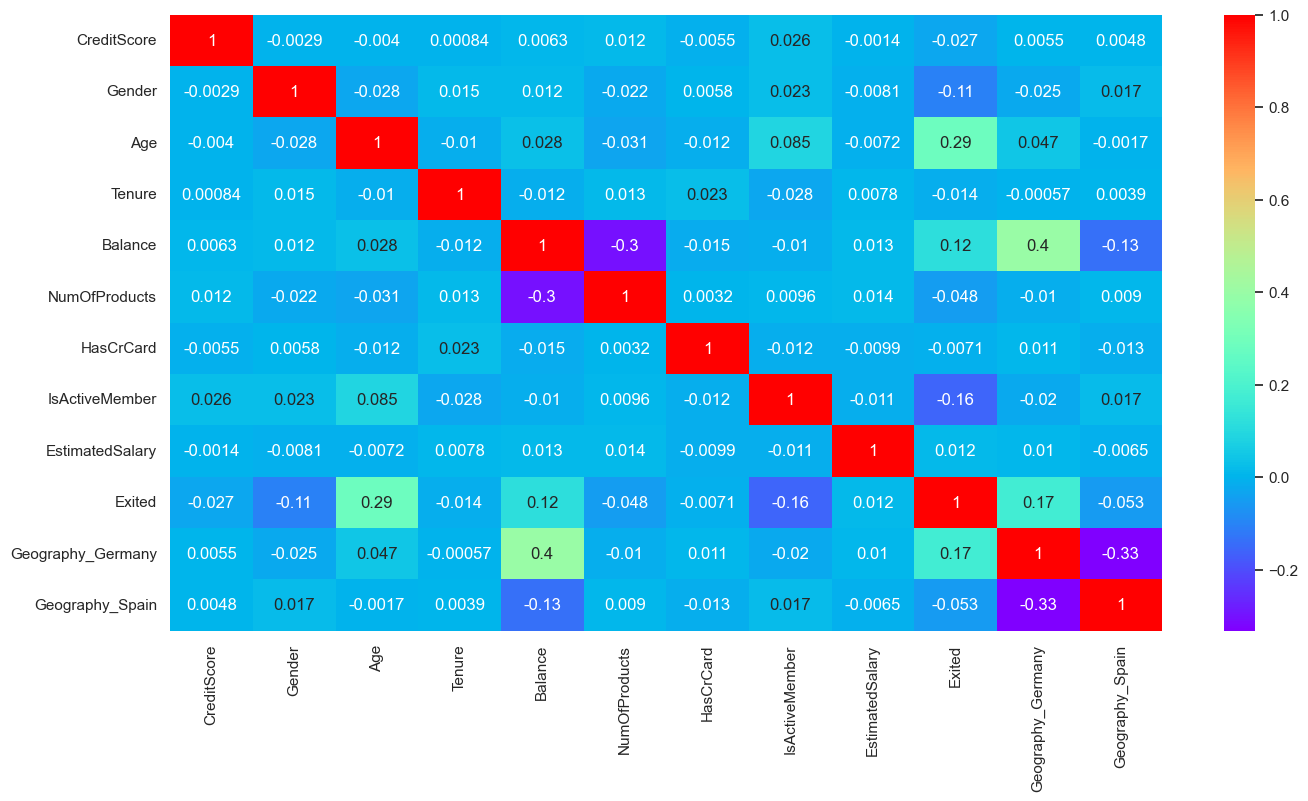

In [343]:
plt.figure(figsize=(16,8))
sns.heatmap(dataset.corr(),cmap='rainbow',annot=True)
plt.show()

In [344]:
import dtale
dtale.show(dataset)

<Axes: xlabel='Exited'>

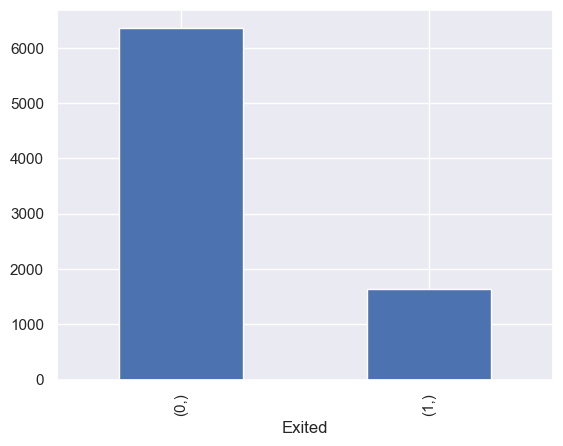

In [345]:
pd.DataFrame(y_train).value_counts().plot(kind='bar')

In [346]:
pd.DataFrame(y_test).value_counts()

Exited
0         1593
1          407
Name: count, dtype: int64

In [347]:
# So by using Stratify = y my both train and test of target feature seen both values

# Outlier Treatment

# DT - we are not doing Outlier Treatment as it is based on conditions

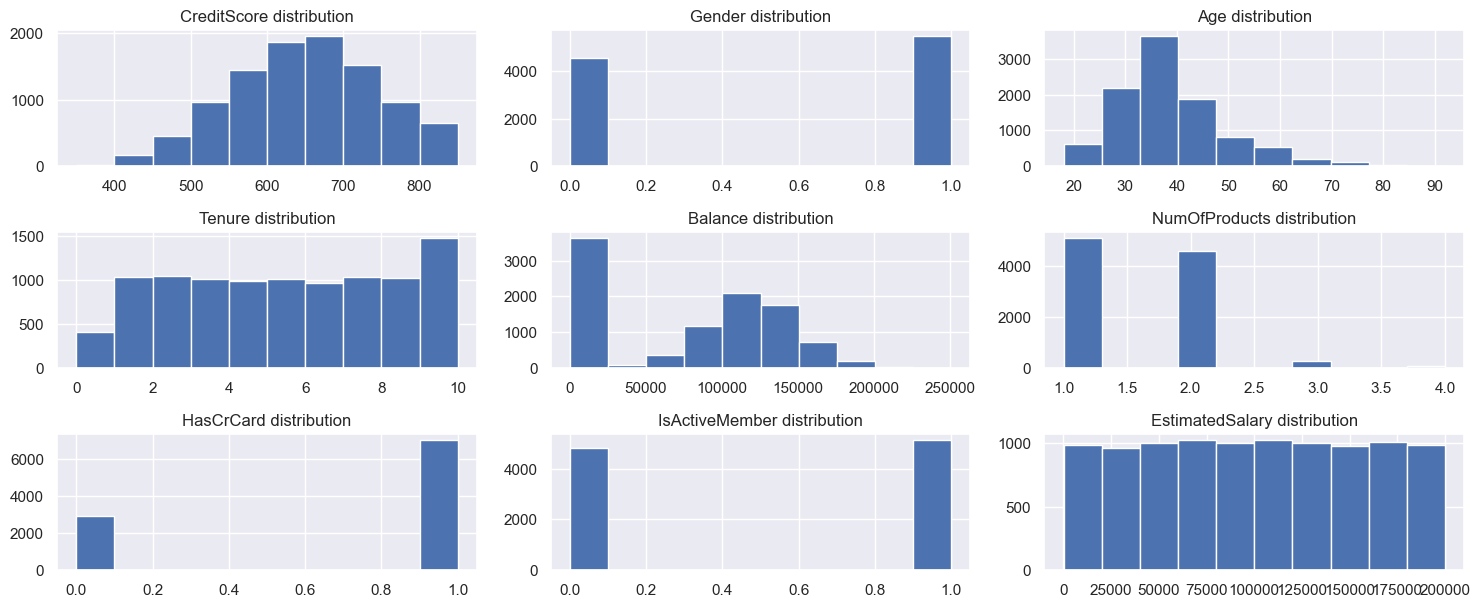

In [348]:
def draw_histogram(dataset, variables, n_rows, n_cols):
    fig = plt.figure(figsize=(15, 10))
    
    # Filter out boolean variables
    non_bool_vars = [var for var in variables if dataset[var].dtype != 'bool']
    
    for i, var_name in enumerate(non_bool_vars):
        ax = fig.add_subplot(n_rows, n_cols, i + 1)#row,col,index to create the subplot within
        dataset[var_name].hist(bins=10, ax=ax)
        ax.set_title(var_name + ' distribution')
    
    plt.tight_layout()
    plt.show()


draw_histogram(dataset,x,5,3)

# Model Building 

# Model 1 : AdaBoost

In [349]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)

AdaBoostClassifier()

In [350]:
y_pred_train_ada = ada.predict(x_train)
y_pres_test_ada = ada.predict(x_test)

In [351]:
from sklearn.metrics import  confusion_matrix,accuracy_score,classification_report

In [352]:
print(classification_report(y_train,y_pred_train_ada))
print()
print(classification_report(y_test,y_pres_test_ada))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6370
           1       0.74      0.50      0.59      1630

    accuracy                           0.86      8000
   macro avg       0.81      0.73      0.76      8000
weighted avg       0.85      0.86      0.85      8000


              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1593
           1       0.69      0.43      0.53       407

    accuracy                           0.84      2000
   macro avg       0.78      0.69      0.72      2000
weighted avg       0.83      0.84      0.83      2000



In [353]:
print(confusion_matrix(y_train,y_pred_train_ada))
print()
print(confusion_matrix(y_test,y_pres_test_ada))

[[6087  283]
 [ 822  808]]

[[1517   76]
 [ 234  173]]


In [354]:
print(accuracy_score(y_train,y_pred_train_ada))
print()
print(accuracy_score(y_test,y_pres_test_ada))

0.861875

0.845


In [355]:
# precision - how much rightly predicted classes basis on given predicted dataset
#recall -how much rightly predicted classes basis on given actual dataset
# F1 score is the harmonic mean  or harmonic progression relation

# Model 2 : Gradient Boosting

In [356]:
from sklearn.ensemble import GradientBoostingClassifier
gdm = GradientBoostingClassifier()
gdm.fit(x_train,y_train)


GradientBoostingClassifier()

In [357]:
y_pred_gdm_train = gdm.predict(x_train)
y_pred_gdm_test = gdm.predict(x_test)

In [358]:
print(classification_report(y_train,y_pred_gdm_train))
print()
print(classification_report(y_test,y_pred_gdm_test))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6370
           1       0.81      0.52      0.63      1630

    accuracy                           0.88      8000
   macro avg       0.85      0.74      0.78      8000
weighted avg       0.87      0.88      0.87      8000


              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.42      0.54       407

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [359]:
print(accuracy_score(y_train,y_pred_gdm_train))
print()
print(accuracy_score(y_test,y_pred_gdm_test))

0.87675

0.8555


In [360]:
print(confusion_matrix(y_train,y_pred_gdm_train))
print()
print(confusion_matrix(y_test,y_pred_gdm_test))

[[6173  197]
 [ 789  841]]

[[1540   53]
 [ 236  171]]


# Model 3 :XG BOOST

In [361]:
! pip install xgboost

In [362]:
from xgboost import XGBClassifier
xgboost = XGBClassifier()
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [363]:
y_pred_train_xgb = xgboost.predict(x_train)
y_pred_test_xgb = xgboost.predict(x_test)

In [364]:
print(classification_report(y_train,y_pred_train_xgb))
print()
print(classification_report(y_test,y_pred_test_xgb))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      6370
           1       0.97      0.82      0.89      1630

    accuracy                           0.96      8000
   macro avg       0.96      0.91      0.93      8000
weighted avg       0.96      0.96      0.96      8000


              precision    recall  f1-score   support

           0       0.86      0.95      0.91      1593
           1       0.68      0.42      0.52       407

    accuracy                           0.84      2000
   macro avg       0.77      0.68      0.71      2000
weighted avg       0.83      0.84      0.83      2000



In [365]:
print(accuracy_score(y_train,y_pred_train_xgb))
print()
print(accuracy_score(y_test,y_pred_test_xgb))

0.95775

0.8415


# Applying K Fold 

In [366]:
from sklearn.model_selection import cross_val_score
training_accuracy = cross_val_score(xgboost,x_train,y_train,cv=10)
print(training_accuracy.mean())

0.85375


In [367]:
# < less than 10% variance we can consider 

# Model 4: Bagging Classifier

In [368]:
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier()
bagging.fit(x_train,y_train)

BaggingClassifier()

In [369]:
y_pred_train_bagging = bagging.predict(x_train)
y_pred_test_bagging = bagging.predict(x_test)

In [370]:
print(classification_report(y_train,y_pred_train_bagging))
print()
print(classification_report(y_test,y_pred_test_bagging))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6370
           1       1.00      0.93      0.96      1630

    accuracy                           0.98      8000
   macro avg       0.99      0.96      0.98      8000
weighted avg       0.98      0.98      0.98      8000


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.71      0.43      0.53       407

    accuracy                           0.85      2000
   macro avg       0.79      0.69      0.72      2000
weighted avg       0.83      0.85      0.83      2000



In [371]:
print(accuracy_score(y_train,y_pred_train_bagging))
print()
print(accuracy_score(y_test,y_pred_test_bagging))

0.984625

0.8475


In [372]:
# More than 10% variance

# Model 5 : Random Forest

In [373]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [374]:
y_pred_train_rf = rf.predict(x_train)
y_pred_test_rf = rf.predict(x_test)

In [375]:
print(classification_report(y_train,y_pred_train_rf))
print()
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6370
           1       1.00      1.00      1.00      1630

    accuracy                           1.00      8000
   macro avg       1.00      1.00      1.00      8000
weighted avg       1.00      1.00      1.00      8000


              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1593
           1       0.74      0.42      0.54       407

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



In [376]:
print(accuracy_score(y_train,y_pred_train_rf))
print()
print(accuracy_score(y_test,y_pred_test_rf))

1.0

0.8525


In [377]:
# again 14 % variance

In [378]:
# Please note - ,Boosting is for high bias problem and Bagging is for high variance poblem

# Model No 6 - KNN Model (K- Nearest Neighbors)

In [379]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

# Ensure y_test is a numpy array or a pandas Series
y_test = np.array(y_test)  # Convert y_test to a numpy array if it's a DataFrame

for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    # Get predictions
    y_pred = knn.predict(x_test)
    
    # Ensure y_pred is also a numpy array
    y_pred = np.array(y_pred)
    
    # Compute the error rate by comparing arrays
    error_rate.append(np.mean(y_pred != y_test))

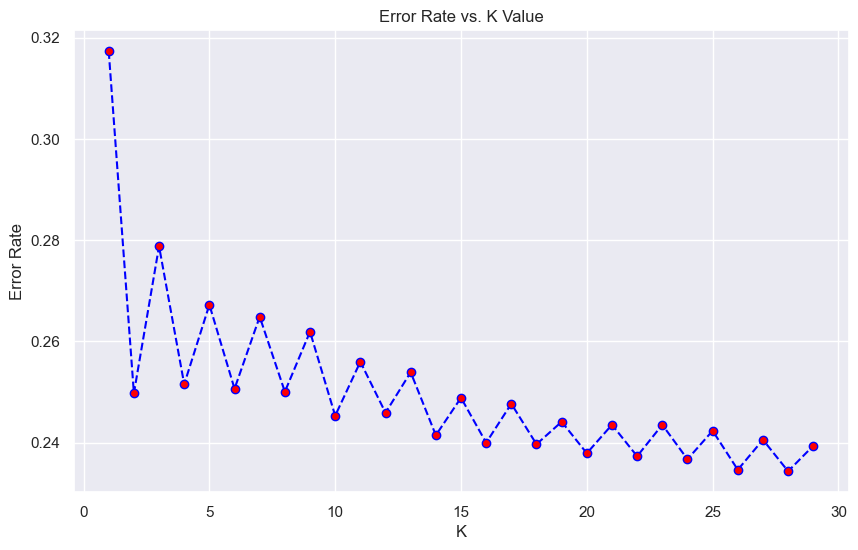

In [380]:
# Optionally, you can plot the results as before
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, 30), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red')
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [381]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=27)

In [382]:
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [383]:
print(classification_report(y_train,y_pred_train_knn))
print()
print(classification_report(y_test,y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      6370
           1       0.80      0.30      0.44      1630

    accuracy                           0.84      8000
   macro avg       0.82      0.64      0.68      8000
weighted avg       0.84      0.84      0.81      8000


              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1593
           1       0.74      0.23      0.35       407

    accuracy                           0.83      2000
   macro avg       0.78      0.60      0.62      2000
weighted avg       0.81      0.83      0.79      2000



In [384]:
print(accuracy_score(y_train,y_pred_train_knn))
print()
print(accuracy_score(y_test,y_pred_test_knn))

0.842875

0.826


# Model No- 7 - Voting Classifier

In [385]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [386]:
clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = RandomForestClassifier()
clf4 = AdaBoostClassifier()
clf5 = KNeighborsClassifier()
clf6 = BaggingClassifier()
clf7 = GradientBoostingClassifier()
clf8 = XGBClassifier()

In [387]:
print(x.shape,y.shape)

(10000, 11) (10000, 1)


In [388]:
estimators = [('lr',clf1),('dt',clf2),('rf',clf3),('ada',clf4),('knn',clf5),('bagg',clf6),('grd',clf7),('xgb',clf8)]

In [389]:
for i in estimators:
    r= cross_val_score(i[1],x,y,cv=10,scoring='accuracy')
    print(i[0],np.round(np.mean(r),2))

lr 0.79
dt 0.79
rf 0.86
ada 0.86
knn 0.77
bagg 0.85
grd 0.86
xgb 0.85


In [390]:
from sklearn.ensemble import VotingClassifier
vc = VotingClassifier(estimators=estimators,voting='hard')
vc_cross_val = cross_val_score(vc,x,y,cv=10,scoring='accuracy')
print(vc_cross_val)

[0.856 0.849 0.876 0.86  0.865 0.85  0.866 0.874 0.862 0.848]


In [391]:
print(np.round(np.mean(vc_cross_val),2))

0.86


# Stacking 

In [392]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

In [393]:
estimators = [('rf',RandomForestClassifier()),
               ('logit',LogisticRegression()),
              ('dtree',DecisionTreeClassifier()),
              ('bagg',BaggingClassifier())
             ]

In [394]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators ,final_estimator=LogisticRegression(),
                         cv=10)


In [395]:
clf

StackingClassifier(cv=10,
                   estimators=[('rf', RandomForestClassifier()),
                               ('logit', LogisticRegression()),
                               ('dtree', DecisionTreeClassifier()),
                               ('bagg', BaggingClassifier())],
                   final_estimator=LogisticRegression())

In [396]:
clf.fit(x_train,y_train)


StackingClassifier(cv=10,
                   estimators=[('rf', RandomForestClassifier()),
                               ('logit', LogisticRegression()),
                               ('dtree', DecisionTreeClassifier()),
                               ('bagg', BaggingClassifier())],
                   final_estimator=LogisticRegression())

In [397]:
y_pred_train_clf = clf.predict(x_train)
y_pred_test_clf = clf.predict(x_test)

                               

In [398]:
print(accuracy_score(y_train,y_pred_train_clf))
print()
print(accuracy_score(y_test,y_pred_test_clf))

0.999875

0.8505


In [399]:
train_acc = cross_val_score(clf,x_train,y_train,cv=10)
print(train_acc.mean())

0.866


NameError: name 's' is not defined